In [1]:
import pickle
#loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [2]:
# loading our models
from keras.models import load_model
skill_prediction_model = load_model('skill_prediction.h5')
job_predictor_model = load_model('job_predictor.h5')

In [3]:
# loading vectorizer and tokenizer

with open('vectorizer.pickle', 'rb') as handle:
    vectorizer = pickle.load(handle)

with open('LabelEncoder.pickle', 'rb') as handle:
    LabelEncoder = pickle.load(handle)


In [4]:
from keras_preprocessing.sequence import pad_sequences
def predict(model,tokenizer,word):
    input = pad_sequences(tokenizer.texts_to_sequences([word]),maxlen=20)
    # input = tokenizer.texts_to_sequences([word])
    d = model.predict(input)
    # print('probebilty ',d)
    if d <= 0.5:
        d = 0 #'non skill word'
    else:
        d = 1 #'skill word' 
    return d

In [5]:
import nltk
import spacy
import string
import re
#Initializing the spacy engine and then use it to process the text:
nlp = spacy.load('en_core_web_sm')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
stop_words = set(stopwords.words("english"))
# remove stopwords function
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    r = TreebankWordDetokenizer().detokenize(filtered_text)
    return r

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def text_preprocess(text):
    r = text.lower() # coverting into lower case
    r = remove_stopwords(r) # removing stop words
    r = re.sub(r'\d+', '', r) # removing numbers
    r = remove_punctuation(r) # removing punctuations
    r = " ".join(r.split()) # removing white sapce
    r = ''.join(r.splitlines()) # removing newline character
    return r

In [27]:
# function for the predicting job title
import numpy as np
import matplotlib.pyplot as plt

def predict_title(text):
    nouns = []
    doc = nlp(text.lower()) # lowercase
    for chunk in doc.noun_chunks: # extracting nouns from the text input
        chunk = text_preprocess(str(chunk))
        nouns.append(chunk)
    dir_temp = dict()
    for i in nouns:
        # print(type(i))
        r = predict(skill_prediction_model,tokenizer,i) # predicting skill words using Our LSTM model
        if r == 1:
          dir_temp[i] = r
    print(list(dir_temp.keys())) # printing extracted skill words
    data = str(list(dir_temp.keys())) 
    print(type(data))
    vec_data = vectorizer.transform([data]) # vectorizing the skill words
    pred = job_predictor_model.predict(vec_data) # predicting the job title
    print(pred)
    title = np.argmax(pred,axis=1) # taking highest percentage

    title = LabelEncoder.inverse_transform(title)
    print('Your most suitable job title is ', title)
    titles = LabelEncoder.classes_
    # ['Cloud Engineer', 'Data Analyst', 'Database Administrator',
    #    'Full Stack Developer', 'Machine Learning Engineer']
   
    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))

    plt.bar(titles, pred[0], width = barWidth,color = 'b',
            edgecolor ='grey',label = 'Job Titles')

    plt.xlabel('Job Titles', fontweight ='bold', fontsize = 15)
    plt.ylabel('Maching Percentage', fontweight ='bold', fontsize = 15)

    plt.legend()
    plt.show()
   
   

    
    

In [7]:
# raw text for the input
text = '''Data Scientist/Analyst (Intern), Workforce Management Team

The Dayforce Product Development team is looking for an intern data scientist or analyst to create the industry’s next generation Human Capital Management (HCM) solutions.

As a scientist/analyst on our Workforce Management team you will be working on our ground-breaking solution that helps companies increase their efficiencies through tracking time and attendance and intelligent scheduling of their employees. You will use your knowledge and expertise to help research and add machine learning capabilities to the Dayforce product. Your impact will be evident through your effective participation in the entire lifecycle of our software including design, analysis, prototyping, development, testing and support of our products. You will work closely and collaborate with clients, prospects, implementation partners, and Dayforce personnel to envision and deliver the required functionality.

This is an excellent opportunity to help shape, direct, and make your mark on a product that impacts thousands of clients and millions of people worldwide. If you're interested in data and algorithms, have vision to see possibilities, want to see your creation utilized by thousands of people all over the world, and possess one or more of the following qualifications, we want to talk to you.

Qualifications:

Experience implementing machine learning models either as a standalone system or as a service
Knowledge of SQL and an understanding of relational database systems
Highly organized, disciplined self-starter, capable of working independently and in close collaboration within an agile development team
Passion for experimentation and analysis
Excellent communication and collaboration skills
Excellent oral and written communication and presentation skills required
Experience with Python is helpful
Experience working with Azure is helpful

Primary Responsibilities/ What you’ll get to do :

You will get to work on a Machine Learning Forecasting project where you will participate in the entire lifecycle of our software including design, analysis, prototyping, development, testing and support of our products. You will work closely and collaborate with clients, prospects, implementation partners, and Dayforce personnel to envision and deliver the required functionality.

Qualifications/Skills and experience we value:

Experience implementing machine learning models either as a standalone system or as a service
Knowledge of SQL and an understanding of relational database systems
Highly organized, disciplined self-starter, capable of working independently and in close collaboration within an agile development team
Passion for experimentation and analysis
Excellent communication and collaboration skills
Excellent oral and written communication and presentation skills required
Experience with Python is helpful
Experience working with Azure is helpful

We understand that no matter where you are, choosing a new employer is always one of life’s most stressful events. We encourage you to check us out at Ceridian.com or follow us on LinkedIn to learn more about how we are impacting the world of work for our customers, employees and you!

Ceridian is fueled by the diversity of our talented employees. We are an equal opportunity employer and consider and embrace ALL individuals and what makes them unique. We believe our employees should be happy and healthy, with peace of mind and a sense of fulfillment. We provide our employees with comprehensive benefits for various life circumstances and needs, great opportunities for career development, and a balanced lifestyle to achieve personal and professional success. We encourage all individuals to apply for positions that fit their passions.
'''

1/1 [==============================] - 0s 29ms/step
['dayforce product development team', 'analyst', 'intelligent scheduling', 'machine learning capabilities', 'analysis', 'development', 'data', 'algorithms', 'machine learning models', 'sql', 'agile development team passion', 'python', 'career development']
<class 'str'>
1/1 [==============================] - 0s 19ms/step
[[0.40260896 0.64967424 0.20650233 0.53082836 0.8166539 ]]
Your most suitable job title is  ['machine learning engineer']


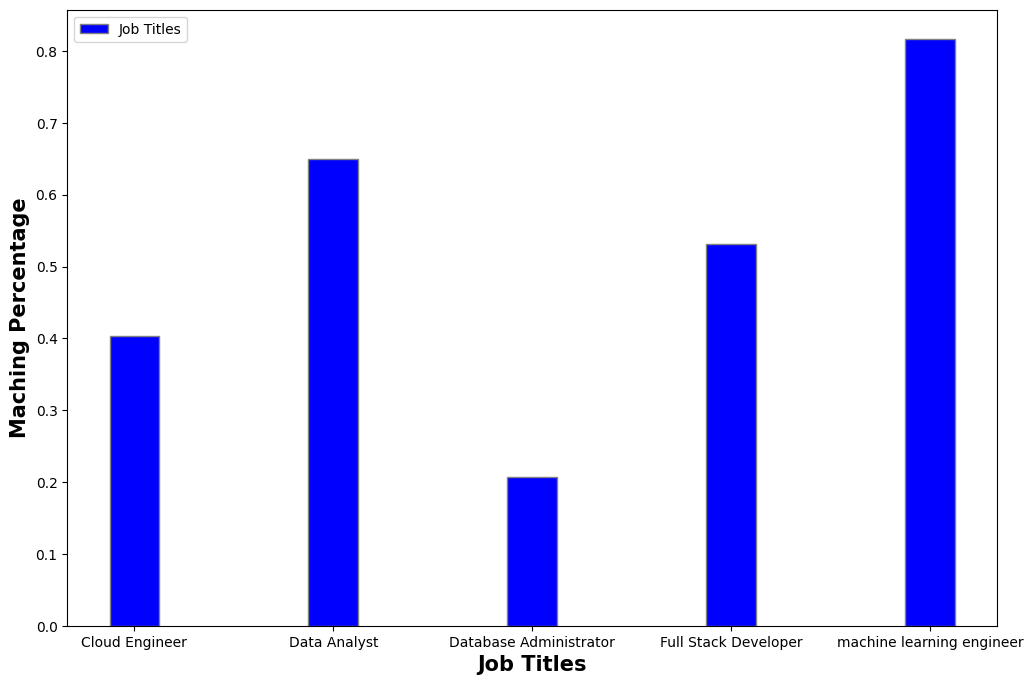

In [29]:
predict_title(text)


In [19]:
pred[0]

array([0.40260896, 0.64967424, 0.20650233, 0.53082836, 0.8166539 ],
      dtype=float32)

In [10]:
LabelEncoder.classes_

array(['Cloud Engineer', 'Data Analyst', 'Database Administrator',
       'Full Stack Developer', 'machine learning engineer'], dtype=object)

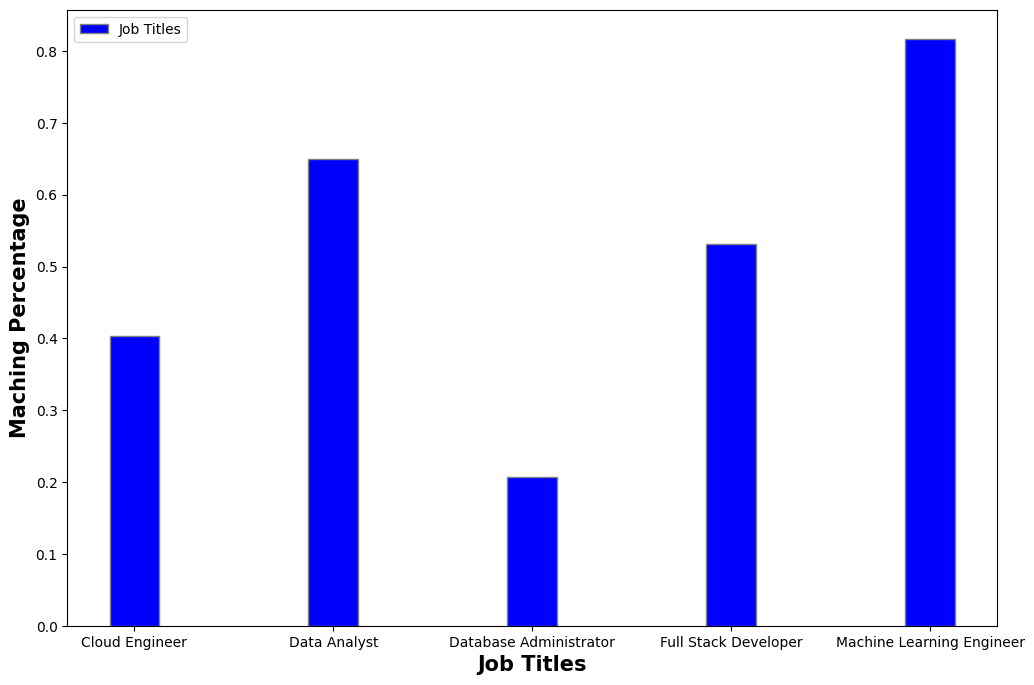

In [20]:
# generaing graphs for the predicted job titles

import matplotlib.pyplot as plt

acc = [0.39805248,0.73204684,0.0981024,0.60161215,0.874477]
titles = ['Cloud Engineer', 'Data Analyst', 'Database Administrator',
       'Full Stack Developer', 'Machine Learning Engineer']



# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.bar(titles, pred[0], width = barWidth,color = 'b',
        edgecolor ='grey',label = 'Job Titles')
plt.xlabel('Job Titles', fontweight ='bold', fontsize = 15)
plt.ylabel('Maching Percentage', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()